In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Con nucleo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


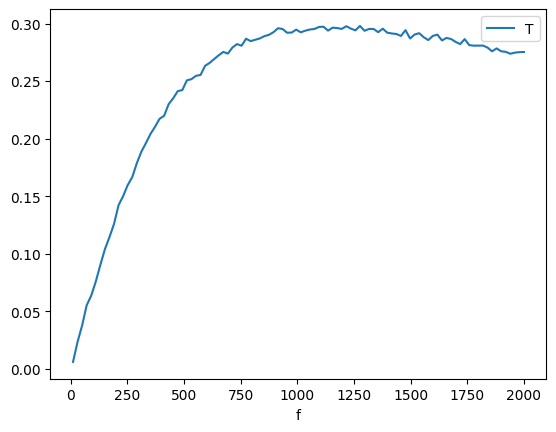

In [13]:
arx = "transformadores_parasitos_con_nucleo.txt"
#Lp = 0.56m, Ls=400m, R=100

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'T'])

# Tomo solo la parte real, como es la magnitud la parte img es nula
df_T = pd.to_numeric( df['T'].str.split(',', expand=True)[0] )

# agrego ruido para darle realismo
mean = 0
std_dev = 0.002
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_T))

df["T"]= df_T + ruido

# info
df.plot(x='f', y='T')

print(df.info())

# guardo
df.to_csv("induccion_con_nucleo.csv", index=False)

# Sin nucleo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


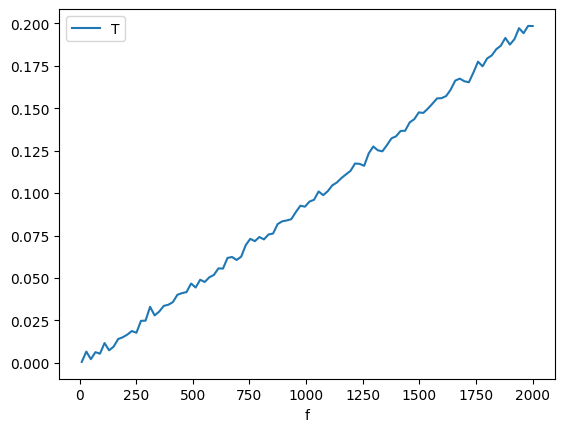

In [14]:
arx = "transformadores_parasitos_sin_nucleo.txt"
#Lp = 0.07m, Ls=50m, R=100

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'T'])

# Tomo solo la parte real, como es la magnitud la parte img es nula
df_T = pd.to_numeric( df['T'].str.split(',', expand=True)[0] )

# agrego ruido para darle realismo
mean = 0
std_dev = 0.002
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_T))

df["T"]= df_T + ruido

# info
df.plot(x='f', y='T')

print(df.info())

# guardo
df.to_csv("induccion_sin_nucleo.csv", index=False)

In [12]:
# sin nucleo
Lp = 0.07
Ls = 50
k = 0.8
M = k*np.sqrt(Lp*Ls)

# con nucleo
mu= 8
Lsn = mu*Ls
Lpn = mu*Lp

print (f"{Lpn}, {Lsn}")


0.56, 400


# Recibo vr y vs, con nucleo

In [ ]:
arx = "transformadores_parasitos_CN.txt"
#Lp = 0.56m, Ls=400m, R=100

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'vs', 'vR'])

# agrego ruido para darle realismo
mean = 0
std_dev = 0.002

df_vs = pd.to_numeric( df['vs'].str.split(',', expand=True)[0] )
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_vs))
df["vs"] = df_vs+ruido

df_vr = pd.to_numeric( df['vR'].str.split(',', expand=True)[0] )
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_vr))

df["vR"] = df_vr+ruido

df.to_csv("induccion_CN.csv", index=False)

# Recibo vr y vs, SIN nucleo

In [13]:
arx = "transformadores_parasitos_SN.txt"
#Lp = 0.07m, Ls=50m, R=100

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'vs', 'vR'])

# agrego ruido para darle realismo
mean = 0
std_dev = 0.002

df_vs = pd.to_numeric( df['vs'].str.split(',', expand=True)[0] )
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_vs))
df["vs"] = df_vs+ruido

df_vr = pd.to_numeric( df['vR'].str.split(',', expand=True)[0] )
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_vr))

df["vR"] = df_vr+ruido


df.to_csv("induccion_SN.csv", index=False)